In [1]:
import pandas as pd
import numpy as np
from StringIO import StringIO
from zipfile import ZipFile
from urllib import urlopen
import statsmodels.formula.api as smf
import h2o

import pandas as pd
import numpy as np
from StringIO import StringIO
from zipfile import ZipFile
from urllib import urlopen
import requests
import csv
import matplotlib.pylab as plt
# import seaborn as sns
import pylab as pylab
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def unzip_read_file(year):
    url = urlopen("http://www.nyc.gov/html/nypd/downloads/zip/analysis_and_planning/{}_sqf_csv.zip".format(year))
    zipfile = ZipFile(StringIO(url.read()))
    try:
        with zipfile.open("{}.csv".format(year)) as file:
            df = pd.read_csv(file)
            
    except: # 2015 csv name is different format than all the rest...go figure.
        with zipfile.open("{}_sqf_csv.csv".format(year)) as file:
            df = pd.read_csv(file)
    return df

In [3]:
df = pd.DataFrame()


In [4]:
# This will capture all data. Loading may take a while and will consume a fair amount of memory. 
# Recommended 16GB of memory if you want to run this cell...

# the rename is there to normalize the data from year to year. without,
# data of different years will not overlap properly

cols = []
#
# for year in range(2003, 2016):
for year in range(2013, 2016):

    year_df = unzip_read_file(year)
    year_df.rename(columns={'adrnum': 'addrnum', 'adrpct': 'addrpct', 'detailcm': 'detailCM', 
                            'dettyp_c': 'dettypCM', 'dettypcm': 'dettypCM', 'linecm': 'lineCM', 
                            'premtyp': 'premtype', 'prenam': 'prename', 'rescod': 'rescode',
                            'stinter': 'strintr', 'stname': 'strname'}, inplace=True)
    cols.append(list(year_df.columns))
    if len(list(year_df.columns)) != len(set(list(year_df.columns))):
        print sorted(list(year_df.columns))
    print year
    df = df.append(year_df)

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (10,73,83) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2013


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (10,83) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2014
2015


In [228]:
# early years missing detailCM, so excluded at this point...

# 'year', 'pct', 'datestop', 'timestop', 'age' , 'perobs'


sqf_primary_select = df.loc[:,['inout', 'explnstp', 'arstmade', 
      'sumissue', 'frisked', 'searched', 'contrabn',  
      'rf_vcrim', 'rf_othsw', 'rf_attir', 'cs_objcs', 'cs_descr', 
      'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 
      'cs_furtv', 'rf_rfcmp', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 
      'cs_other',  'rf_knowl',  'sb_hdobj', 'sb_outln', 'sb_admis', 
      'sb_other', 'rf_furt', 'rf_bulg',  'sex', 'race']] # 'detailCM'

In [229]:
sqf_primary_select2 = df.loc[:,['year', 'inout', 'explnstp', 'arstmade', 
      'sumissue', 'frisked', 'searched', 'contrabn',  
      'rf_vcrim', 'rf_othsw', 'rf_attir', 'cs_objcs', 'cs_descr', 
      'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 
      'cs_furtv', 'rf_rfcmp', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 
      'cs_other',  'rf_knowl',  'sb_hdobj', 'sb_outln', 'sb_admis', 
      'sb_other', 'rf_furt', 'rf_bulg',  'sex', 'race']]

In [230]:
def fix_nans(column):
    if column in [' ', '  ', '']:
        column = np.nan
    
    return column

In [231]:
for i in sqf_primary_select.columns:
    sqf_primary_select[i] = sqf_primary_select[i].apply(fix_nans)
    sqf_primary_select2[i] = sqf_primary_select2[i].apply(fix_nans)

In [232]:
# original data size
len(sqf_primary_select)

5814879

In [233]:
# Dataframe after nan reduction
sqf_primary_select.dropna(inplace=True)
sqf_primary_select2.dropna(inplace=True)

len(sqf_primary_select)

5769889

In [234]:
df.groupby('year').count()

,ac_assoc,ac_cgdir,ac_evasv,ac_incid,ac_inves,ac_other,ac_proxm,ac_rept,ac_stsnd,ac_time,...,sumissue,sumoffen,timestop,trhsloc,typeofid,weight,wepfound,xcoord,ycoord,zip
year,,,,,,,,,,,,,,,,,,,,,
2003,321702,321702,321702,321702,321702,321702,321702,321702,321702,321702,...,321702,321636,321702,321702,321702,321702,0,321702,321702,321702
2004,313523,313523,313523,313523,313523,313523,313523,313523,313523,313523,...,313523,313441,313523,313523,313523,313523,0,313523,313523,313523
2005,398191,398191,398191,398191,398191,398191,398191,398191,398191,398191,...,398191,398072,398191,398191,398191,398191,0,398191,398191,398191
2006,506491,506491,506491,506491,506491,506491,506491,506491,506491,506491,...,506491,506424,506491,506491,506491,506491,506491,506491,506491,506491
2007,472096,472096,472096,472096,472096,472096,472096,472096,472096,472096,...,472096,472032,472096,472096,472096,472096,0,472096,472096,472096
2008,540302,540302,540302,540302,540302,540302,540302,540302,540302,540302,...,540302,540263,540302,540302,540302,540302,0,540302,540302,540302
2009,581168,581168,581168,581168,581168,581168,581168,581168,581168,581168,...,581168,581138,581168,581168,581168,581168,0,581168,581168,581168
2010,1202570,1202570,1202570,1202570,1202570,1202570,1202570,1202570,1202570,1202570,...,1202570,1202462,1202570,1202570,1202570,1202570,0,1202570,1202570,1202570
2011,685724,685724,685724,685724,685724,685724,685724,685724,685724,685724,...,685724,685705,685724,685724,685724,685724,0,685724,685724,685724


In [235]:
sqf_primary_select2.groupby('year').count()

,inout,explnstp,arstmade,sumissue,frisked,searched,contrabn,rf_vcrim,rf_othsw,rf_attir,...,cs_other,rf_knowl,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,sex,race
year,,,,,,,,,,,,,,,,,,,,,
2003,319774,319774,319774,319774,319774,319774,319774,319774,319774,319774,...,319774,319774,319774,319774,319774,319774,319774,319774,319774,319774
2004,300813,300813,300813,300813,300813,300813,300813,300813,300813,300813,...,300813,300813,300813,300813,300813,300813,300813,300813,300813,300813
2005,383920,383920,383920,383920,383920,383920,383920,383920,383920,383920,...,383920,383920,383920,383920,383920,383920,383920,383920,383920,383920
2006,506486,506486,506486,506486,506486,506486,506486,506486,506486,506486,...,506486,506486,506486,506486,506486,506486,506486,506486,506486,506486
2007,467007,467007,467007,467007,467007,467007,467007,467007,467007,467007,...,467007,467007,467007,467007,467007,467007,467007,467007,467007,467007
2008,540175,540175,540175,540175,540175,540175,540175,540175,540175,540175,...,540175,540175,540175,540175,540175,540175,540175,540175,540175,540175
2009,581168,581168,581168,581168,581168,581168,581168,581168,581168,581168,...,581168,581168,581168,581168,581168,581168,581168,581168,581168,581168
2010,1202570,1202570,1202570,1202570,1202570,1202570,1202570,1202570,1202570,1202570,...,1202570,1202570,1202570,1202570,1202570,1202570,1202570,1202570,1202570,1202570
2011,685724,685724,685724,685724,685724,685724,685724,685724,685724,685724,...,685724,685724,685724,685724,685724,685724,685724,685724,685724,685724


In [236]:
# Data cleaning to generate numeric values


d = {'Y': True, 'N': False}
sqf_primary_select = sqf_primary_select.replace(d)
sqf_primary_select2 = sqf_primary_select2.replace(d)

In [237]:
sqf_primary_numeric = pd.get_dummies(sqf_primary_select)

In [238]:
len(sqf_primary_numeric.columns)

43

In [239]:
n=3 # how many eigenvectors we choose
pca = PCA(n)
Proj = pca.fit_transform(sqf_primary_numeric)

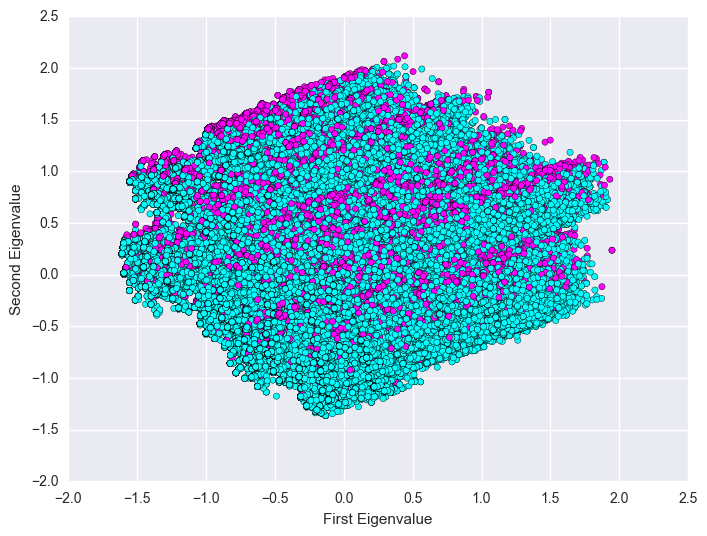

In [140]:
eigenvalues = pca.explained_variance_
plt.figure(figsize=(8, 6))
# Plot the training points
plt.scatter(Proj[:, 0], Proj[:, 1], c=sqf_primary_select.arstmade, cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.show()

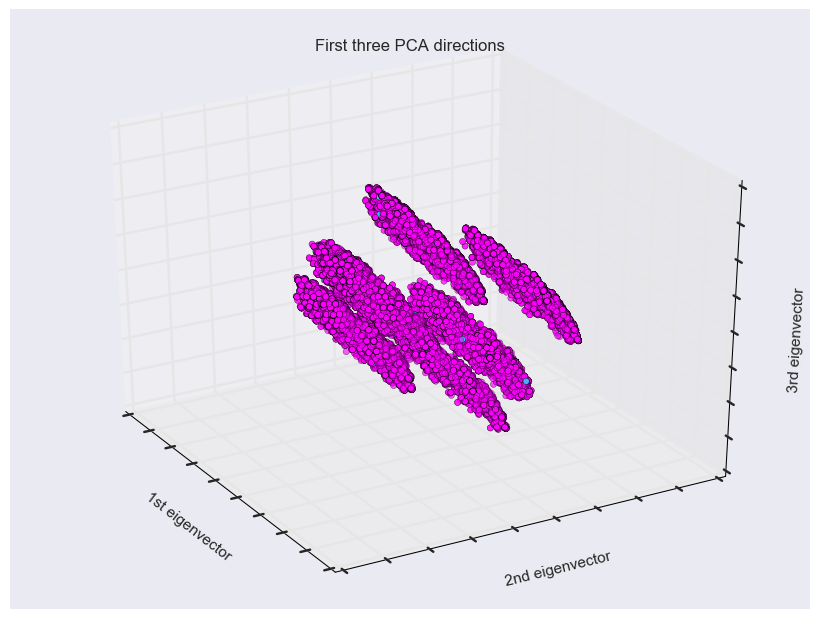

In [141]:

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=30)
ax.scatter(Proj[:, 0], Proj[:, 1], Proj[:, 2],c=sqf_primary_select.explnstp,
           cmap=plt.cm.cool)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [219]:
sqf_primary_select.columns

Index([u'inout', u'explnstp', u'arstmade', u'sumissue', u'frisked',
       u'searched', u'contrabn', u'rf_vcrim', u'rf_othsw', u'rf_attir',
       u'cs_objcs', u'cs_descr', u'cs_casng', u'cs_lkout', u'rf_vcact',
       u'cs_cloth', u'cs_drgtr', u'cs_furtv', u'rf_rfcmp', u'rf_verbl',
       u'cs_vcrim', u'cs_bulge', u'cs_other', u'rf_knowl', u'sb_hdobj',
       u'sb_outln', u'sb_admis', u'sb_other', u'rf_furt', u'rf_bulg', u'sex',
       u'race'],
      dtype='object')

In [240]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=2,random_state=324)
res1=gm.fit(Proj)

In [241]:
clusters = res1.predict(Proj)

In [242]:
sqf_primary_select2['Group'] = clusters

In [244]:
for i in range(2003, 2016):
    print i, 1.*sqf_primary_select2.groupby(['year', 'arstmade']).count()['inout'][i][True]/sum(sqf_primary_select2.groupby(['year', 'arstmade']).count()['inout'][i])*1.

2003 0.0777361511568
2004 0.0521520014095
2005 0.0478198583038
2006 0.0413575103754
2007 0.058361009578
2008 0.0596177164808
2009 0.0600841753159
2010 0.0683269996757
2011 0.0596201970472
2012 0.0606386432256
2013 0.0804947589536
2014 0.149998568443
2015 0.175863138767


In [152]:
print '2006', 20947/485539.

2006 0.0431417455652


In [247]:
sqf_primary_select2.groupby(['year', 'frisked', 'arstmade']).count()

inout  explnstp  sumissue  searched  contrabn  \
year frisked arstmade                                                   
2003 False   False     167604    167604    167604    167604    167604   
             True        5040      5040      5040      5040      5040   
     True    False     127312    127312    127312    127312    127312   
             True       19818     19818     19818     19818     19818   
2004 False   False     173887    173887    173887    173887    173887   
             True        2606      2606      2606      2606      2606   
     True    False     111238    111238    111238    111238    111238   
             True       13082     13082     13082     13082     13082   
2005 False   False     219024    219024    219024    219024    219024   
             True        2960      2960      2960      2960      2960   
     True    False     146537    146537    146537    146537    146537   
             True       15399     15399     15399     15399     15399   
2006 False   False     285602    285602    285602    285602    285602   
             True        3705      3705      3705      3705      3705   
     True    False     199937    199937    199937    199937    199937   
             True       17242     17242     17242     17242     17242   
2007 False   False     220479    220479    220479    220479    220479   
             True        3800      3800      3800      3800      3800   
     True    False     219273    219273    219273    219273    219273   
             True       23455     23455     23455     23455     23455   
2008 False   False     241401    241401    241401    241401    241401   
             True        4965      4965      4965      4965      4965   
     True    False     266570    266570    266570    266570    266570   
             True       27239     27239     27239     27239     27239   
2009 False   False     246079    246079    246079    246079    246079   
             True        5164      5164      5164      5164      5164   
     True    False     300170    300170    300170    300170    300170   
             True       29755     29755     29755     29755     29755   
2010 False   False     514958    514958    514958    514958    514958   
             True       12800     12800     12800     12800     12800   
     True    False     605444    605444    605444    605444    605444   
             True       69368     69368     69368     69368     69368   
2011 False   False     297697    297697    297697    297697    297697   
             True        6323      6323      6323      6323      6323   
     True    False     347144    347144    347144    347144    347144   
             True       34560     34560     34560     34560     34560   
2012 False   False     230500    230500    230500    230500    230500   
             True        5167      5167      5167      5167      5167   
     True    False     270096    270096    270096    270096    270096   
             True       27148     27148     27148     27148     27148   
2013 False   False      77401     77401     77401     77401     77401   
             True        2811      2811      2811      2811      2811   
     True    False      99007     99007     99007     99007     99007   
             True       12632     12632     12632     12632     12632   
2014 False   False      10557     10557     10557     10557     10557   
             True        1356      1356      1356      1356      1356   
     True    False      19131     19131     19131     19131     19131   
             True        3883      3883      3883      3883      3883   
2015 False   False       6405      6405      6405      6405      6405   
             True         901       901       901       901       901   
     True    False      12190     12190     12190     12190     12190   
             True        3067      3067      3067      3067      3067   

                       rf_vcrim  rf_othsw  rf_attir  cs_objcs  cs_descr  \
year f

In [3]:
def make_date(date_string):
    if len(date_string)<8:
        date_string = '0'+date_string
    return date_string

In [7]:
df = pd.DataFrame()
cols = []

d = {'Y': True, 'N': False}
r = {'A': 'ASIAN/PACIFIC ISLANDER', 'B': 'BLACK', 'I': 'AMERICAN INDIAN/ALASKAN NATIVE',
     'P': 'BLACK-HISPANIC', 'Q': 'WHITE-HISPANIC', 'W': 'WHITE', 'U': 'UNKNOWN', 
     'X': 'UNKNOWN', 'Z': 'OTHER'}

master_pt_date = pd.DataFrame()
for year in range(2003, 2016):

    year_df = unzip_read_file(year)
    year_df.rename(columns={'adrnum': 'addrnum', 'adrpct': 'addrpct', 'detailcm': 'detailCM', 
                            'dettyp_c': 'dettypCM', 'dettypcm': 'dettypCM', 'linecm': 'lineCM', 
                            'premtyp': 'premtype', 'prenam': 'prename', 'rescod': 'rescode',
                            'stinter': 'strintr', 'stname': 'strname'}, inplace=True)
    cols.append(list(year_df.columns))
    if len(list(year_df.columns)) != len(set(list(year_df.columns))):
        print sorted(list(year_df.columns))
    print year
    
    year_df['datestop'] = year_df['datestop'].astype(str).apply(make_date)
    year_df = year_df[~year_df['datestop'].isin(['0', '0 '])]
    try:
        year_df.datestop = pd.to_datetime(year_df.datestop, format='%m%d%Y')
    except:
        year_df.datestop = pd.to_datetime(year_df.datestop, format='%Y-%m-%d')
    
    year_df['race'] = year_df['race'].replace(r)
    year_df['arstmade'] = year_df['arstmade'].replace(d)
    
    table_date = pd.pivot_table(year_df, values='year', index=['datestop'], columns='arstmade', aggfunc= 'count')

    table_date['Count'] = table_date[False] + table_date[True]
    table_date['Success_Rate'] = table_date[True] / table_date['Count']
    

    
    master_pt_date = master_pt_date.append(table_date)

2003


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (4,102,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2004


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (73,74,81,82,83,84,85,107,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2005


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (1,2,10,18,19,73,74,105,107) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2006


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (4,73,74,81,82,83,84,85,102,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2007


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (4,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2008


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2009


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (73,74,102,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2010


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (73,103) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2011


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (10,73,103,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2012


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (10,73,83) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2013


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (10,83) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2014
2015


In [16]:
df['datestop'] = df['datestop'].astype(str).apply(make_date)
df.datestop = pd.to_datetime(df.datestop, format='%m%d%Y')

In [85]:
table_r_date = pd.pivot_table(df, values='year', index=['race', 'datestop'], columns='arstmade', aggfunc= 'count')

In [86]:
table_date = pd.pivot_table(df, values='year', index=['datestop'], columns='arstmade', aggfunc= 'count')

table_date['Count'] = table_date[False] + table_date[True]
table_date['Success_Rate'] = table_date[True] / table_date['Count']

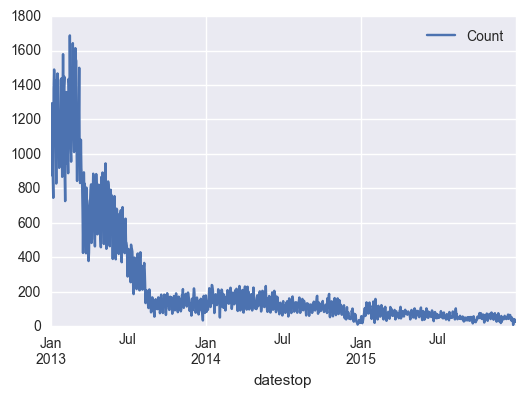

In [93]:
plt.figure(); table_date['Count'].plot(); plt.legend(loc='best')

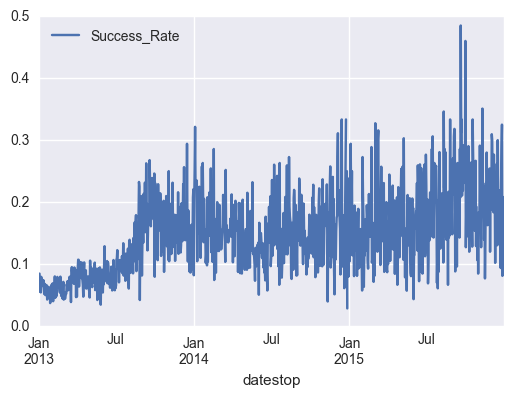

In [95]:
plt.figure(); table_date['Success_Rate'].plot(); plt.legend(loc='best')

In [8]:
master_pt_date.to_csv('date_success_rate.csv')

In [9]:
df_all = pd.read_csv('date_success_rate.csv')

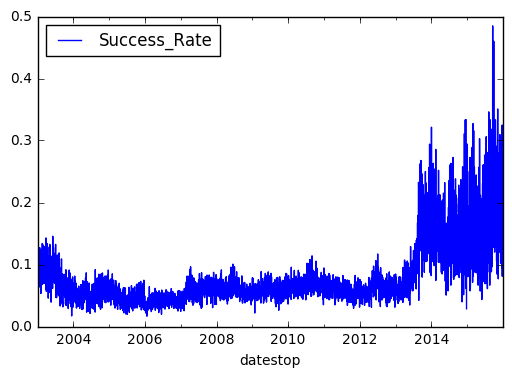

In [10]:
plt.figure(); master_pt_date[master_pt_date.index > '2000-10-16']['Success_Rate'].plot(); plt.legend(loc='best')

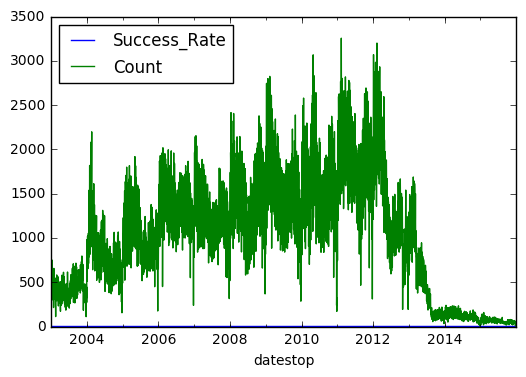

In [20]:

df_all.datestop = pd.to_datetime(df_all.datestop, format='%Y-%m-%d')
plt.figure(); df_all[df_all.datestop > '2000-10-16']['Success_Rate'].plot(); df_all[df_all.datestop > '2000-10-16']['Count'].plot(); plt.legend(loc='best')

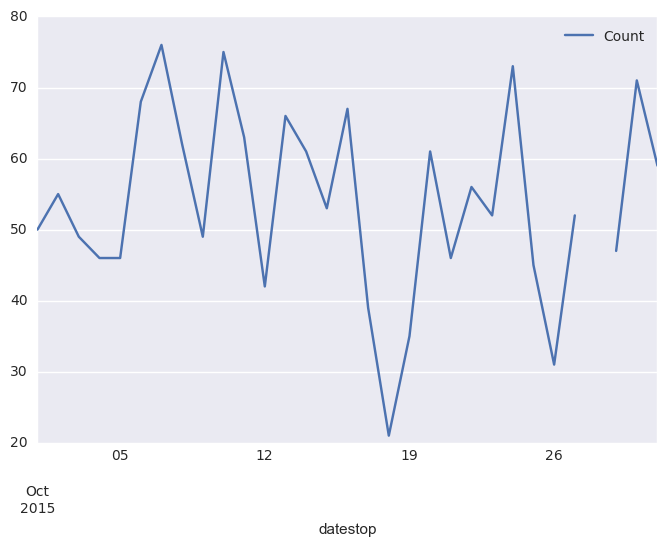

In [34]:
plt.figure();  df_all[(df_all.datestop > '2000-10-16') & (df_all.datestop >= '2015-10-01') & (df_all.datestop < '2015--01')]['Count'].plot(); plt.legend(loc='best')

In [21]:
df_all.index = df_all.datestop
df_all = df_all[df_all.datestop > '2000-10-16']

In [22]:
df_all['Roll_Success_Mean'] = pd.rolling_mean(df_all.Success_Rate, window=30, min_periods=30)



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=30,window=30,center=False).mean()
  if __name__ == '__main__':


In [23]:
MOV = df_all['Roll_Success_Mean'].values
TimeSEries = df_all['Success_Rate'].values
events= []
ind = []
fail_count = 0


In [24]:
for i in range(len(MOV)):
    if ~(MOV[len(MOV) - i-1] > 0.0):
        MOV[len(MOV) - i-1] = MOV[len(MOV) - i]
STD = np.std(MOV)
MEAN = np.mean(MOV)
df_all['MEAN'] = MEAN
df_all['2+STD'] = MEAN + (2*STD)
df_all['2-STD'] = MEAN - (2*STD)
indexes = []
for ii in range(len(TimeSEries)):
    try:
        if (TimeSEries[ii] > MOV[ii]+(2*STD)):
            events.append(TimeSEries[ii])
            indexes.append(ii)
    except:
        fail_count += 1
        pass

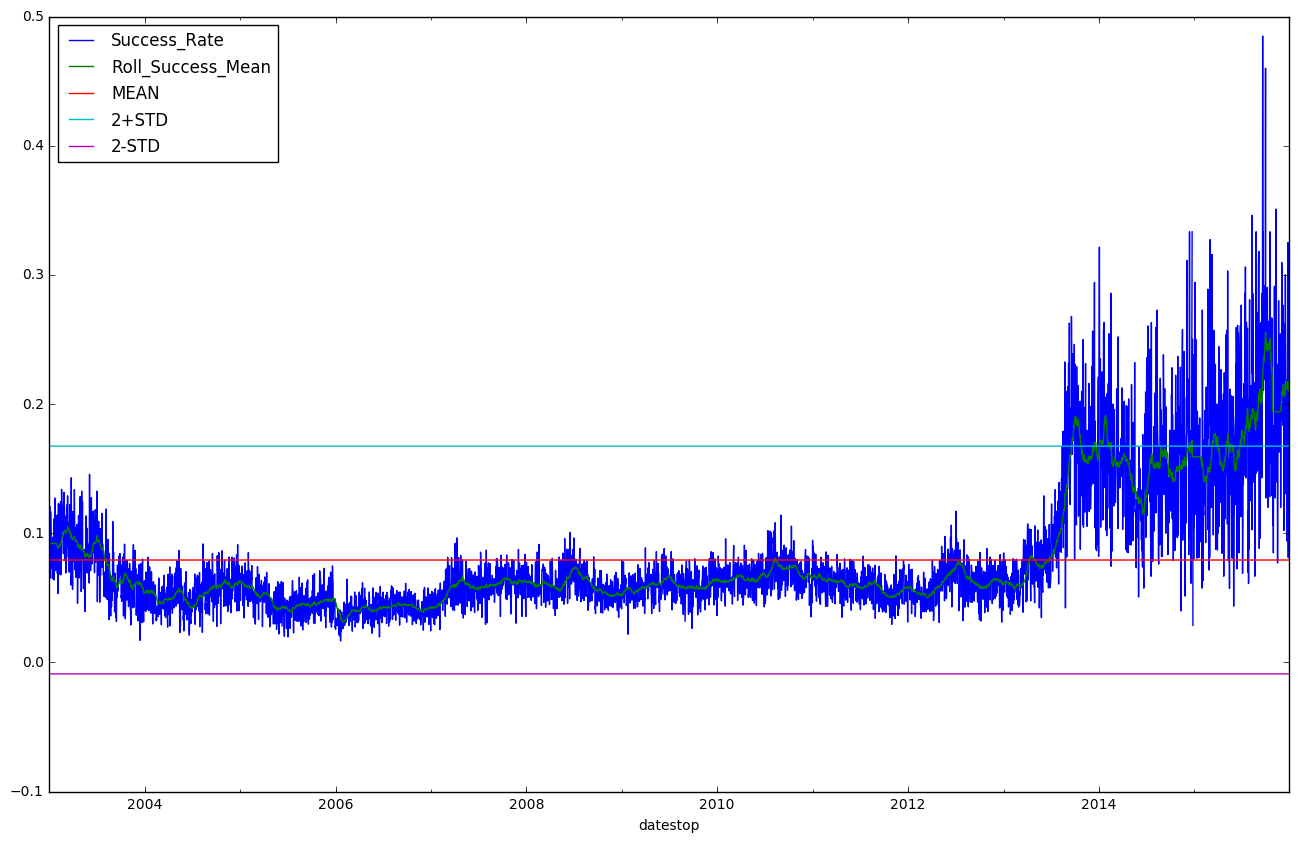

In [25]:
plt.figure(figsize=[16,10]); df_all[df_all.datestop > '2000-10-16']['Success_Rate'].plot(); 
df_all['Roll_Success_Mean'].plot(); df_all['MEAN'].plot(); df_all['2+STD'].plot();df_all['2-STD'].plot();
plt.legend(loc='best')

In [26]:
df_all['MOV_STD'] = df_all['Roll_Success_Mean'] + STD
df_all['MOV_NEG_STD'] = df_all['Roll_Success_Mean'] - STD


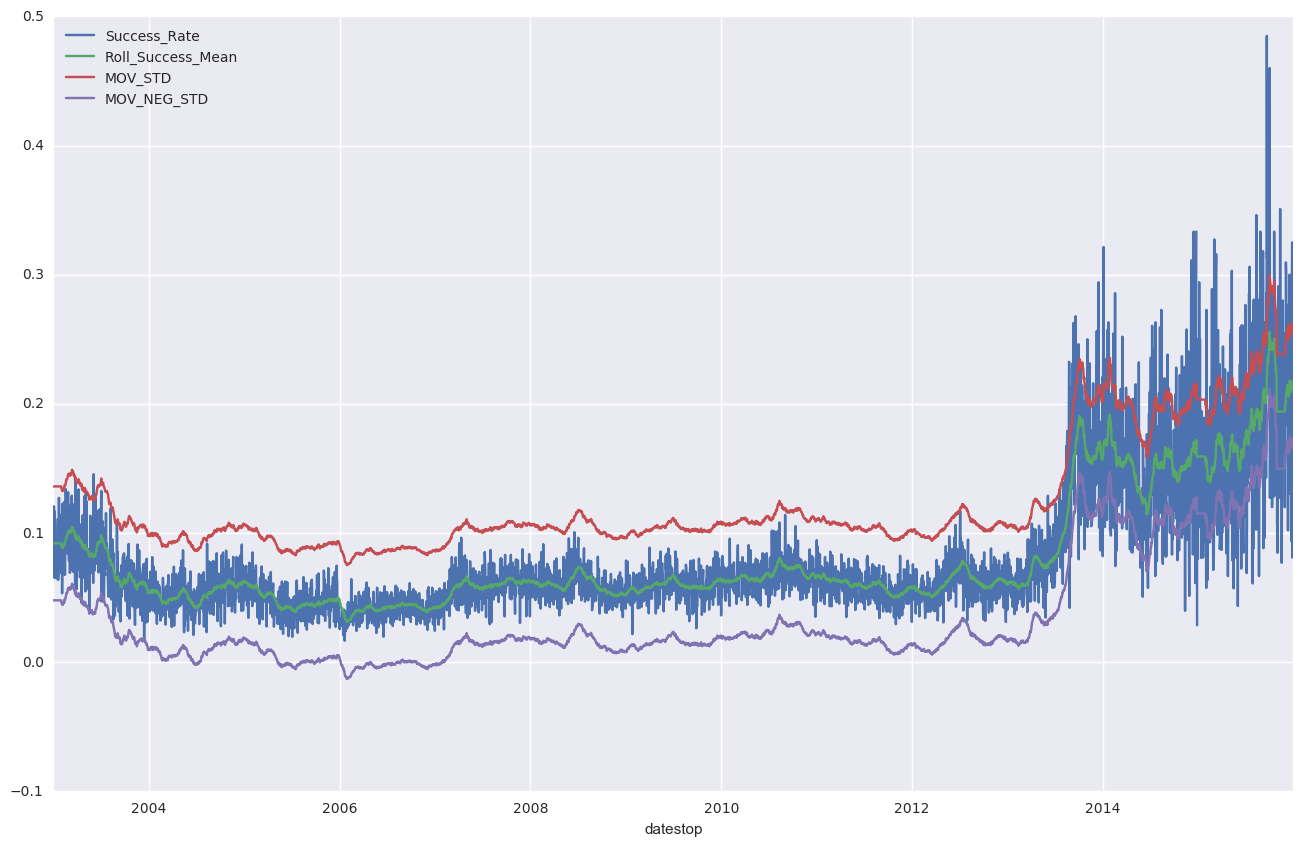

In [28]:
import seaborn
plt.figure(figsize=[16,10]); df_all[df_all.datestop > '2000-10-16']['Success_Rate'].plot(); 
df_all[df_all.datestop > '2000-10-16']['Roll_Success_Mean'].plot(); df_all['MOV_STD'].plot(); df_all['MOV_NEG_STD'].plot(); 
plt.legend(loc='best')

In [19]:

df_all.iloc[indexes,:]

,datestop,False,True,,Count,Success_Rate,Roll_Success_Mean,MEAN,2+STD,2-STD,MOV_STD,MOV_NEG_STD
datestop,,,,,,,,,,,,
2013-08-24,2013-08-24,99.0,30.0,NaN,129.0,0.232558,0.126577,0.079213,0.167385,-0.008958,0.170663,0.082491
2013-08-25,2013-08-25,62.0,18.0,NaN,80.0,0.225000,0.130473,0.079213,0.167385,-0.008958,0.174559,0.086387
2013-09-10,2013-09-10,73.0,26.0,NaN,99.0,0.262626,0.157205,0.079213,0.167385,-0.008958,0.201291,0.113119
2013-09-18,2013-09-18,134.0,49.0,NaN,183.0,0.267760,0.167380,0.079213,0.167385,-0.008958,0.211466,0.123294
2013-11-02,2013-11-02,78.0,26.0,NaN,104.0,0.250000,0.160295,0.079213,0.167385,-0.008958,0.204381,0.116209
2013-12-08,2013-12-08,58.0,20.0,NaN,78.0,0.256410,0.165694,0.079213,0.167385,-0.008958,0.209779,0.121608
2013-12-15,2013-12-15,48.0,20.0,NaN,68.0,0.294118,0.170118,0.079213,0.167385,-0.008958,0.214204,0.126032
2014-01-02,2014-01-02,95.0,32.0,NaN,127.0,0.251969,0.162291,0.079213,0.167385,-0.008958,0.206377,0.118206
2014-01-03,2014-01-03,57.0,27.0,NaN,84.0,0.321429,0.168439,0.079213,0.167385,-0.008958,0.212525,0.124354


In [285]:
len(indexes)*1.0/len(df_all)

0.011583824768323505